In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Contexts Example

This notebook demonstrates how to use Seaborn's display contexts with the `set_context` function. Seaborn provides several built-in contexts that control the scaling of plot elements, making it easy to create visualizations suitable for different display mediums.

In [2]:
# Load the tips dataset from seaborn
df = sns.load_dataset("tips")

# Display the first few rows of the dataset to understand its structure
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Available Contexts in Seaborn

Seaborn provides four predefined contexts that can be set using the `set_context` function:

1. `paper`: Smallest context, suitable for academic papers
2. `notebook`: Medium-sized context, suitable for notebooks (default)
3. `talk`: Larger context, suitable for presentations
4. `poster`: Largest context, suitable for posters

Let's explore each of these contexts by creating the same plot with different contexts.

### Notebook Context (Default)

The notebook context is the default context in Seaborn. It provides a medium-sized scaling suitable for Jupyter notebooks.

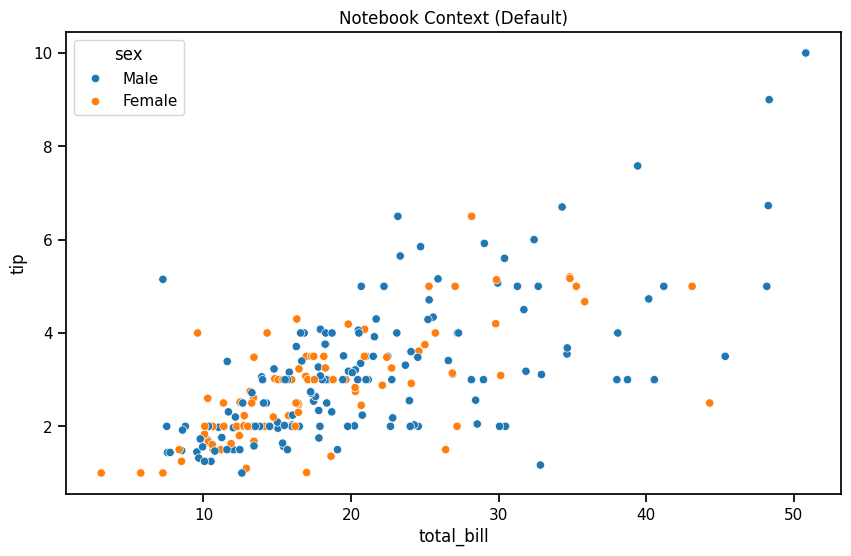

In [3]:
# Set the context to notebook (default)
sns.set_context("notebook")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Notebook Context (Default)")
plt.show()

### Paper Context

The paper context provides the smallest scaling, suitable for academic papers where space is limited.

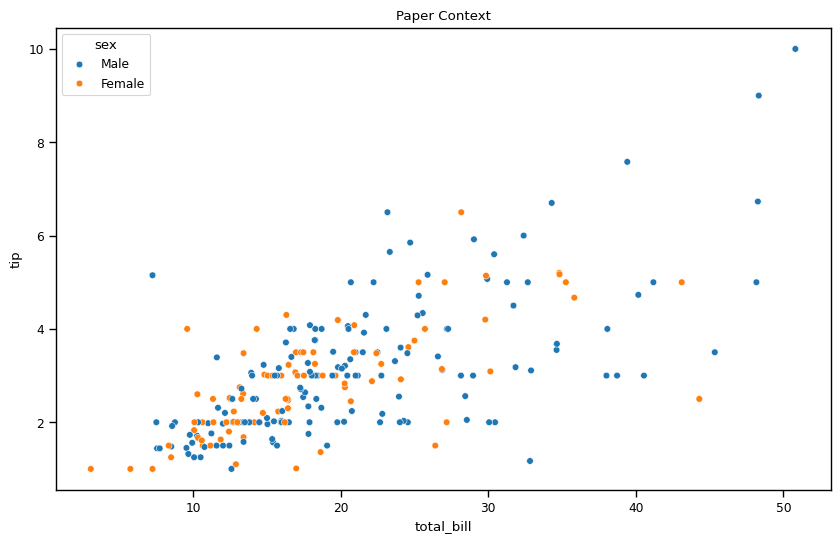

In [4]:
# Set the context to paper
sns.set_context("paper")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Paper Context")
plt.show()

### Talk Context

The talk context provides a larger scaling, suitable for presentations where the plot needs to be visible from a distance.

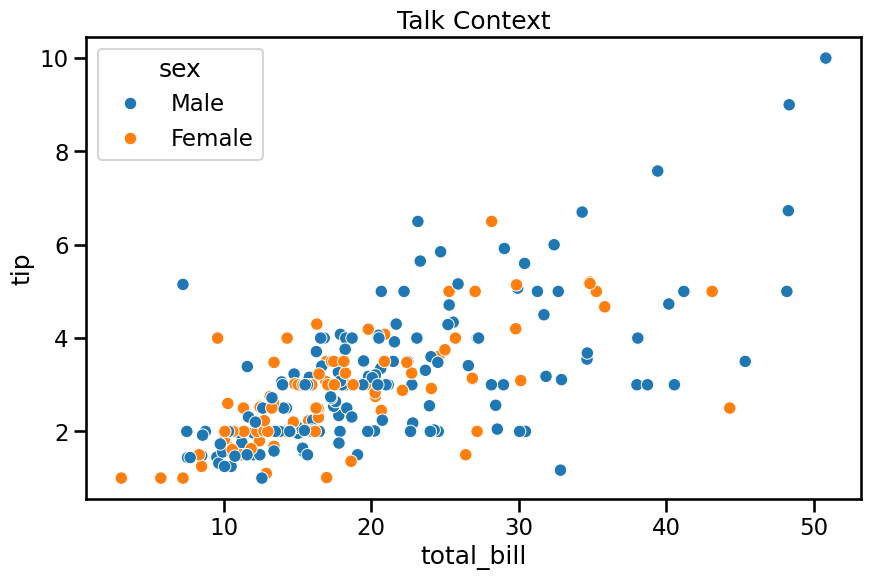

In [5]:
# Set the context to talk
sns.set_context("talk")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Talk Context")
plt.show()

### Poster Context

The poster context provides the largest scaling, suitable for posters where the plot needs to be visible from a significant distance.

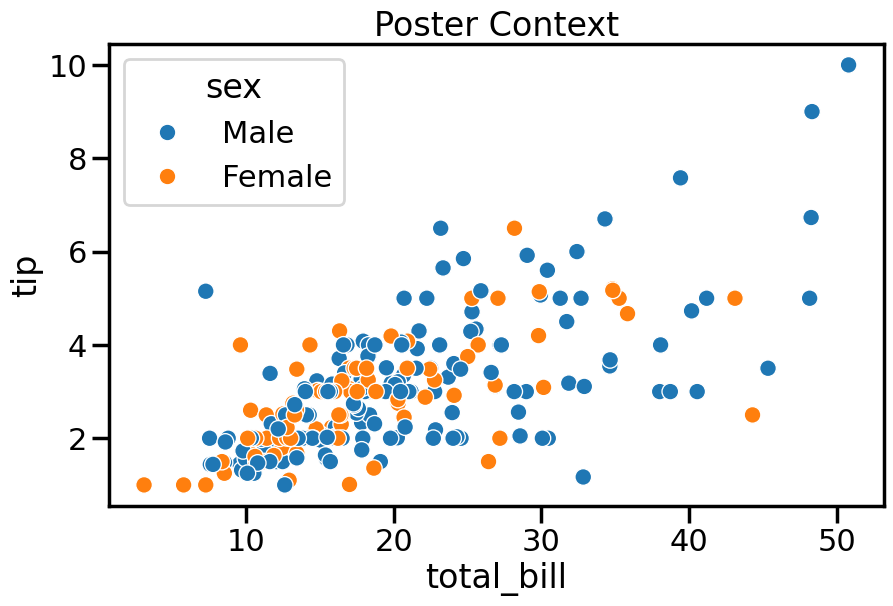

In [6]:
# Set the context to poster
sns.set_context("poster")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Poster Context")
plt.show()

## Comparing All Contexts

Let's create a figure with subplots to compare all four contexts side by side. We'll use a simple line plot to better illustrate the differences in scaling.

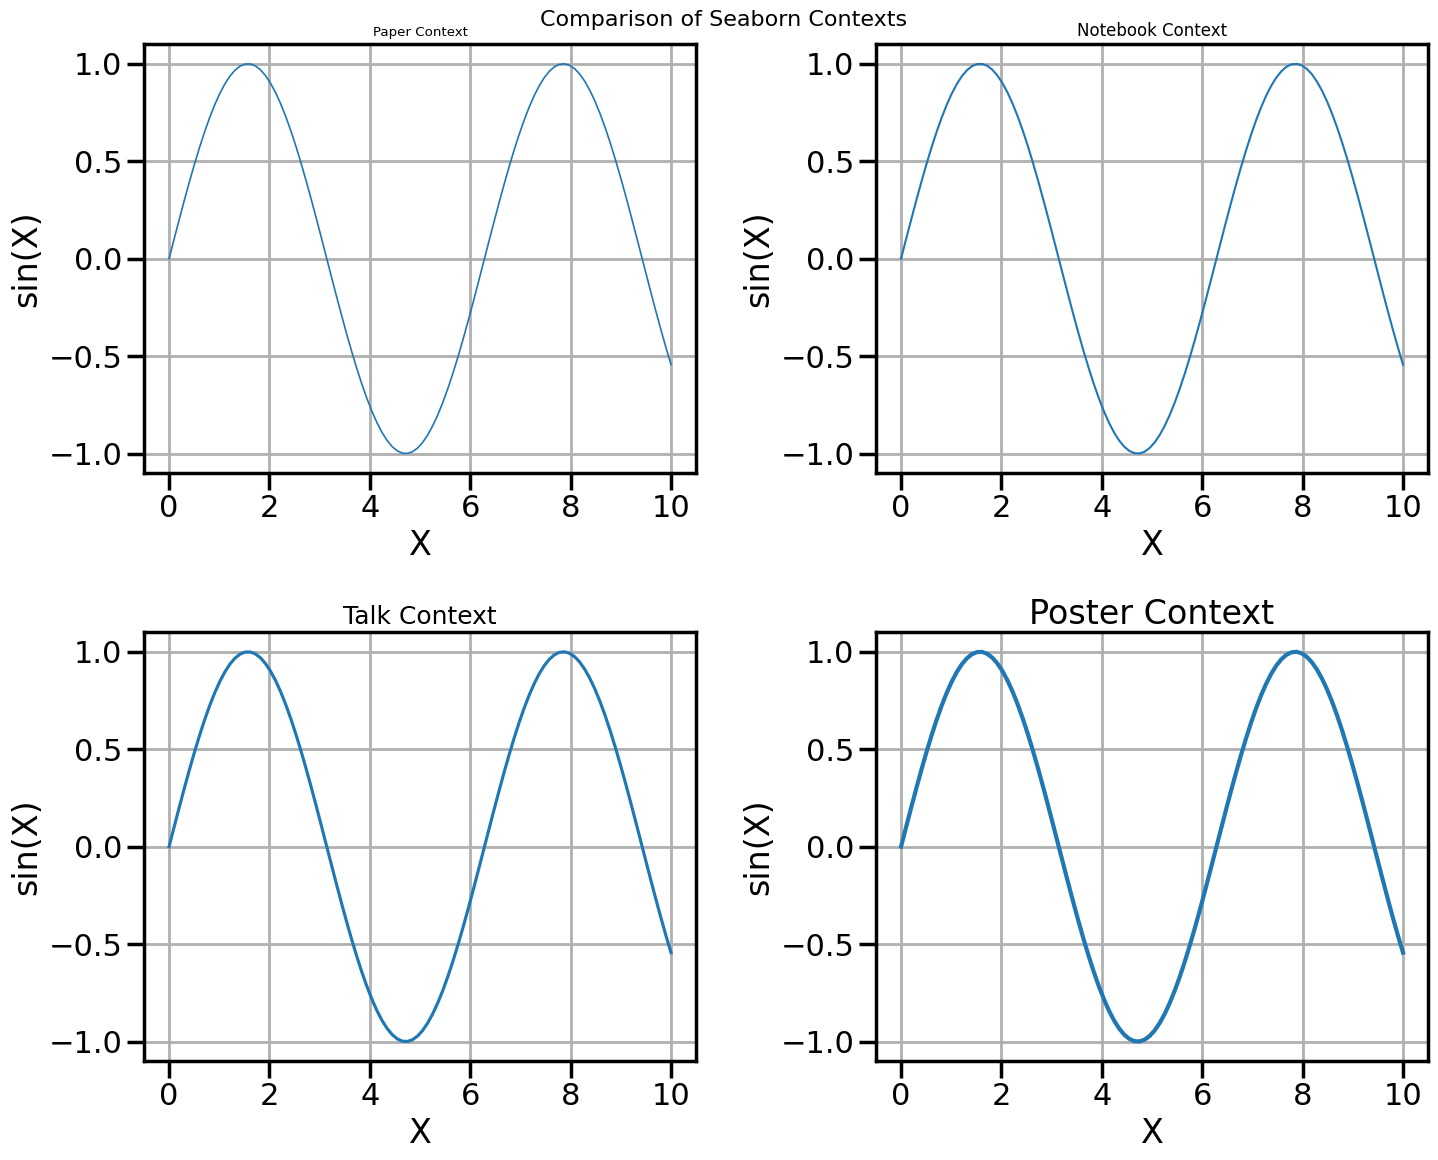

In [7]:
# Create some sample data for a line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# List of contexts
contexts = ["paper", "notebook", "talk", "poster"]

# Create a plot for each context
for i, context in enumerate(contexts):
    with sns.plotting_context(context):  # Temporarily set the context
        # Plot a simple sine wave
        axes[i].plot(x, y)
        axes[i].set_title(f"{context.capitalize()} Context")
        axes[i].set_xlabel("X")
        axes[i].set_ylabel("sin(X)")
        
        # Add grid lines to better see the differences
        axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Comparison of Seaborn Contexts", fontsize=16, y=0.98)
plt.show()

## Customizing Contexts

In addition to the predefined contexts, you can customize specific context elements using the `rc` parameter in `set_context` or by using the `set` function.

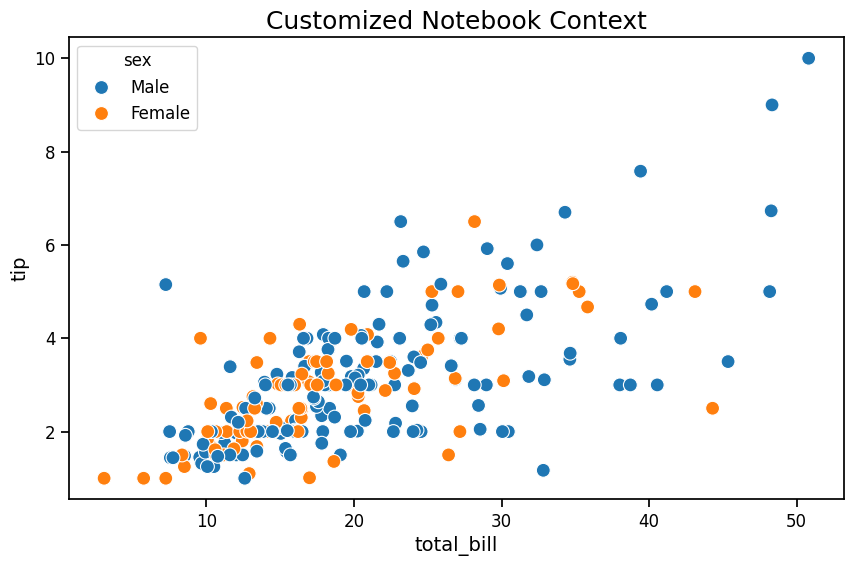

In [8]:
# Set the base context to notebook
sns.set_context("notebook", rc={
    "axes.labelsize": 14,
    "axes.titlesize": 18,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 2.5,
    "lines.markersize": 10
})


# Create a scatter plot with the customized context
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Customized Notebook Context")
plt.show()

## Using a Scaling Factor

The `set_context` function also accepts a scaling factor as a second argument, which allows you to fine-tune the scaling of plot elements.

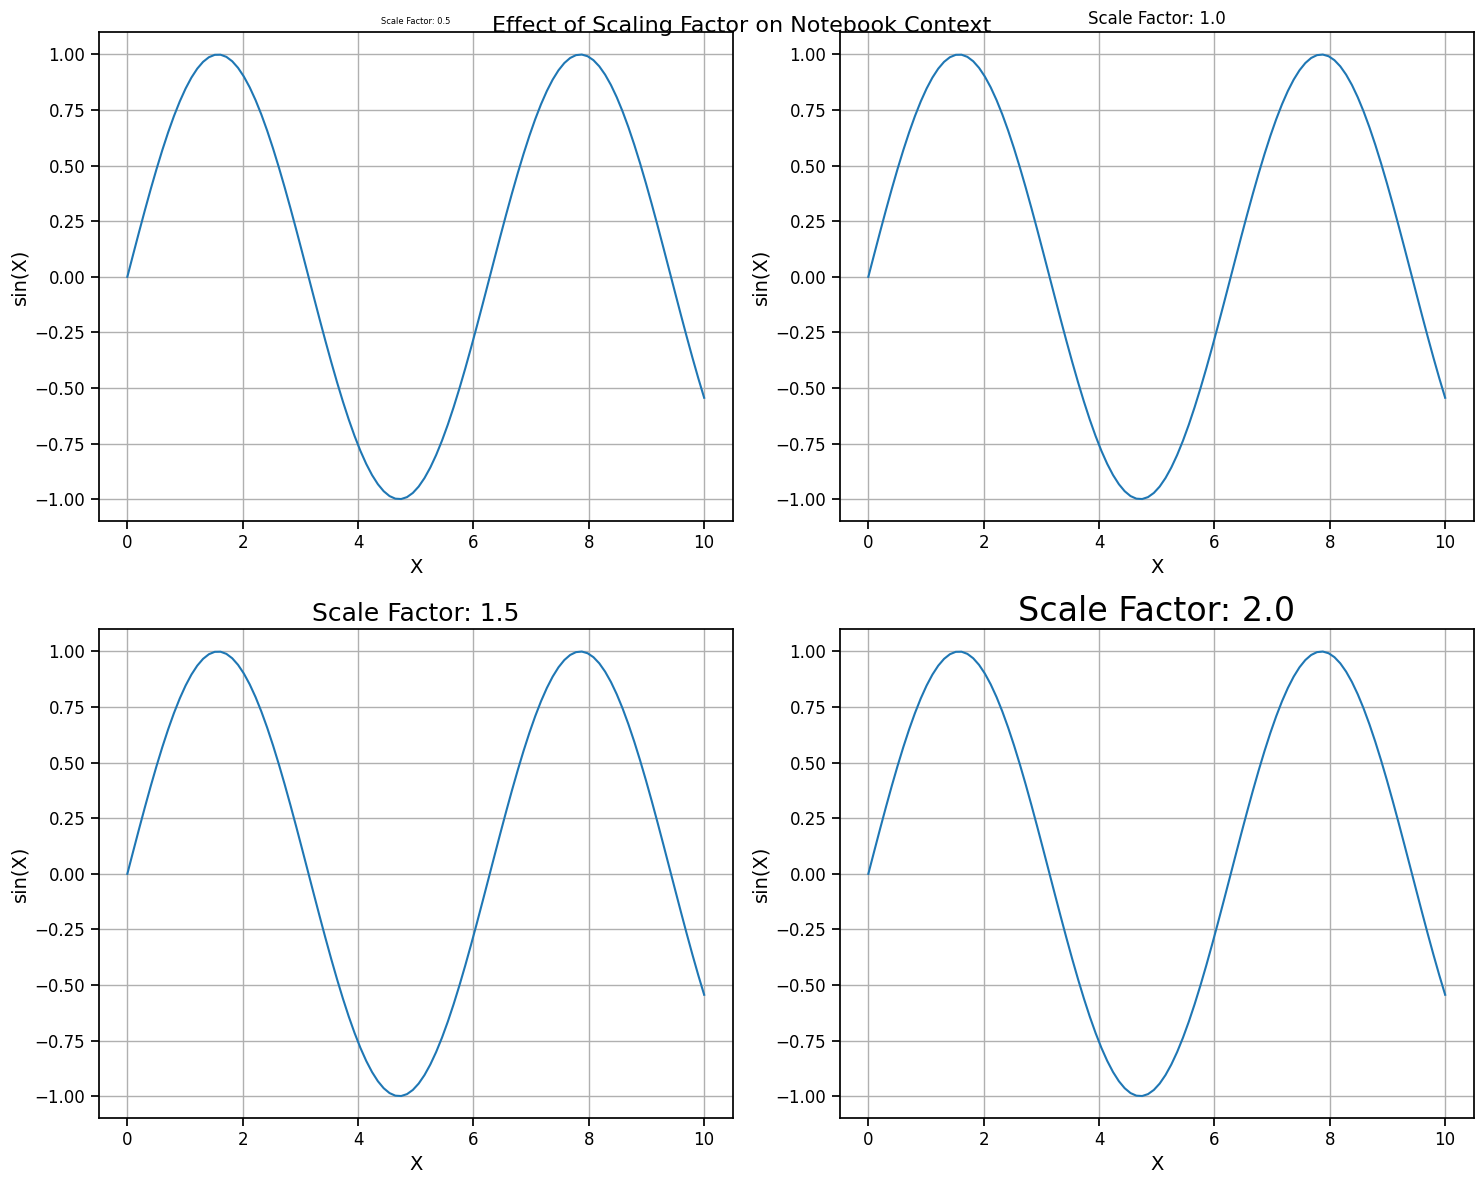

In [9]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Different scaling factors
scaling_factors = [0.5, 1.0, 1.5, 2.0]

# Create a plot for each scaling factor
for i, scale in enumerate(scaling_factors):
    with sns.plotting_context("notebook", font_scale=scale):  # Set the context with a scaling factor
        # Plot a simple sine wave
        axes[i].plot(x, y)
        axes[i].set_title(f"Scale Factor: {scale}")
        axes[i].set_xlabel("X")
        axes[i].set_ylabel("sin(X)")
        
        # Add grid lines to better see the differences
        axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Effect of Scaling Factor on Notebook Context", fontsize=16, y=0.98)
plt.show()

## Combining Styles and Contexts

You can combine different styles and contexts to create a wide variety of visual appearances for your plots.

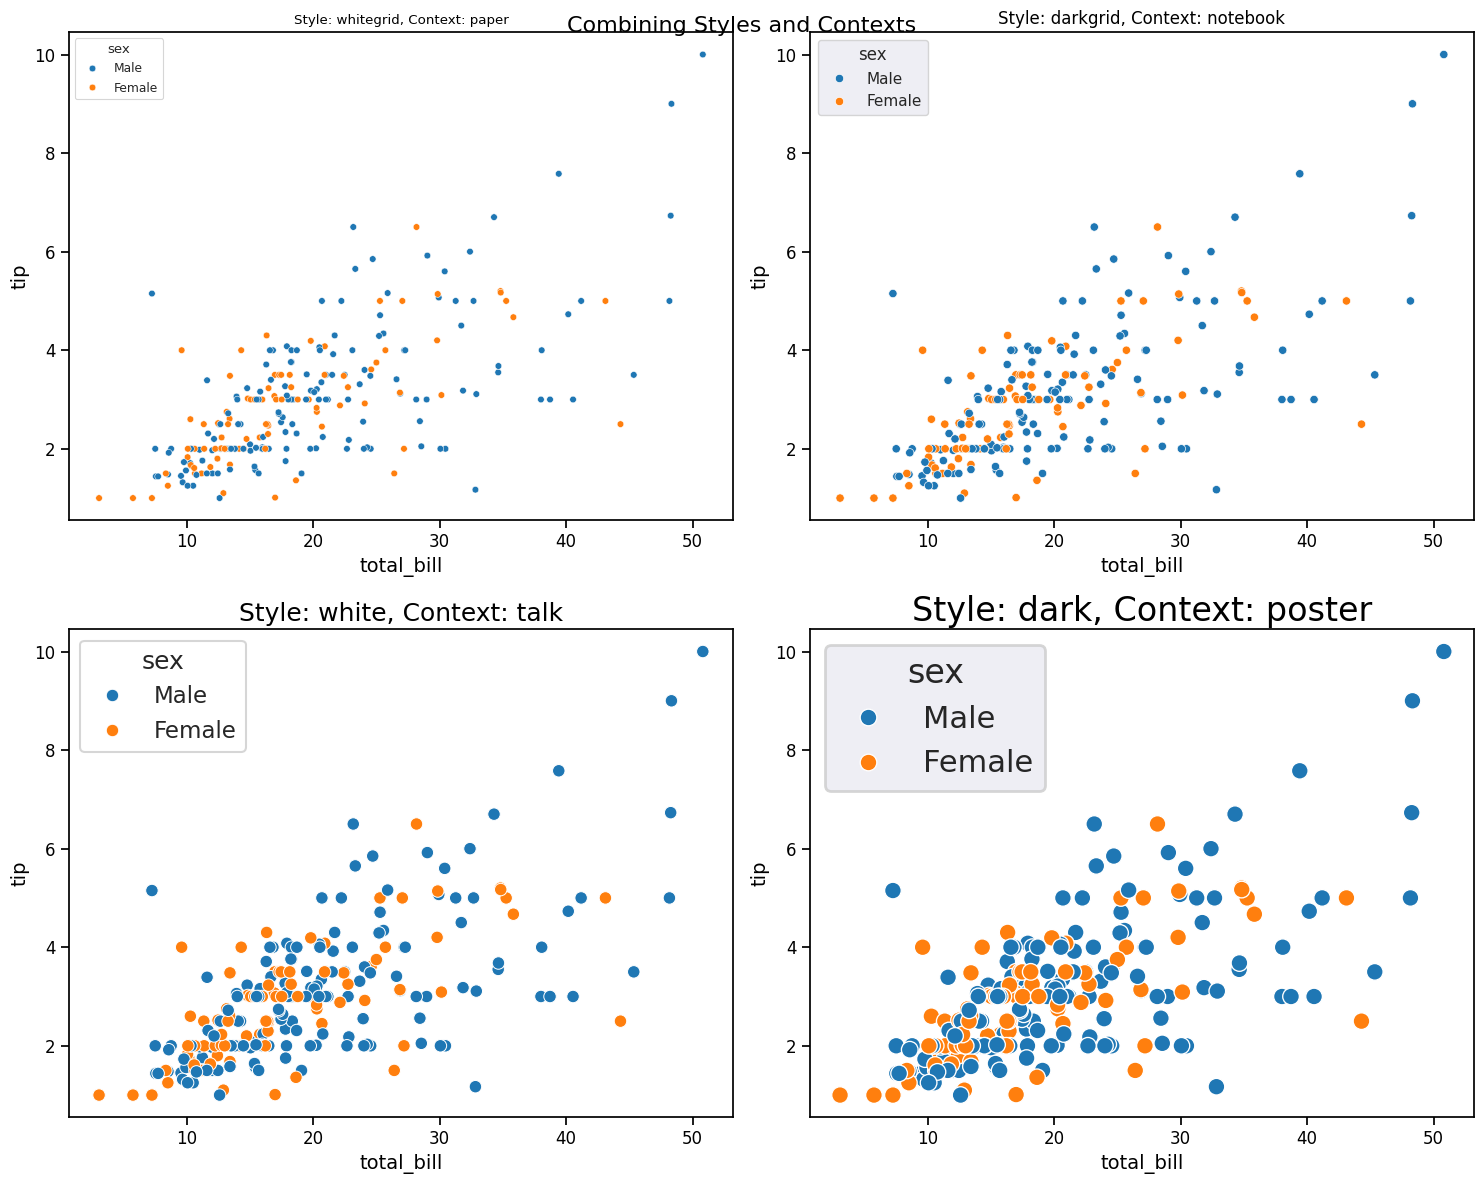

In [10]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Different combinations of styles and contexts
combinations = [
    ("whitegrid", "paper"),
    ("darkgrid", "notebook"),
    ("white", "talk"),
    ("dark", "poster")
]

# Create a plot for each combination
for i, (style, context) in enumerate(combinations):
    with sns.axes_style(style), sns.plotting_context(context):  # Set both style and context
        # Plot a scatter plot
        row, col = divmod(i, 2)
        sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", ax=axes[row, col])
        axes[row, col].set_title(f"Style: {style}, Context: {context}")

plt.tight_layout()
plt.suptitle("Combining Styles and Contexts", fontsize=16, y=0.98)
plt.show()

## Using Contexts Temporarily

You can use the `with` statement to temporarily set a context for a specific plot without affecting the global context.

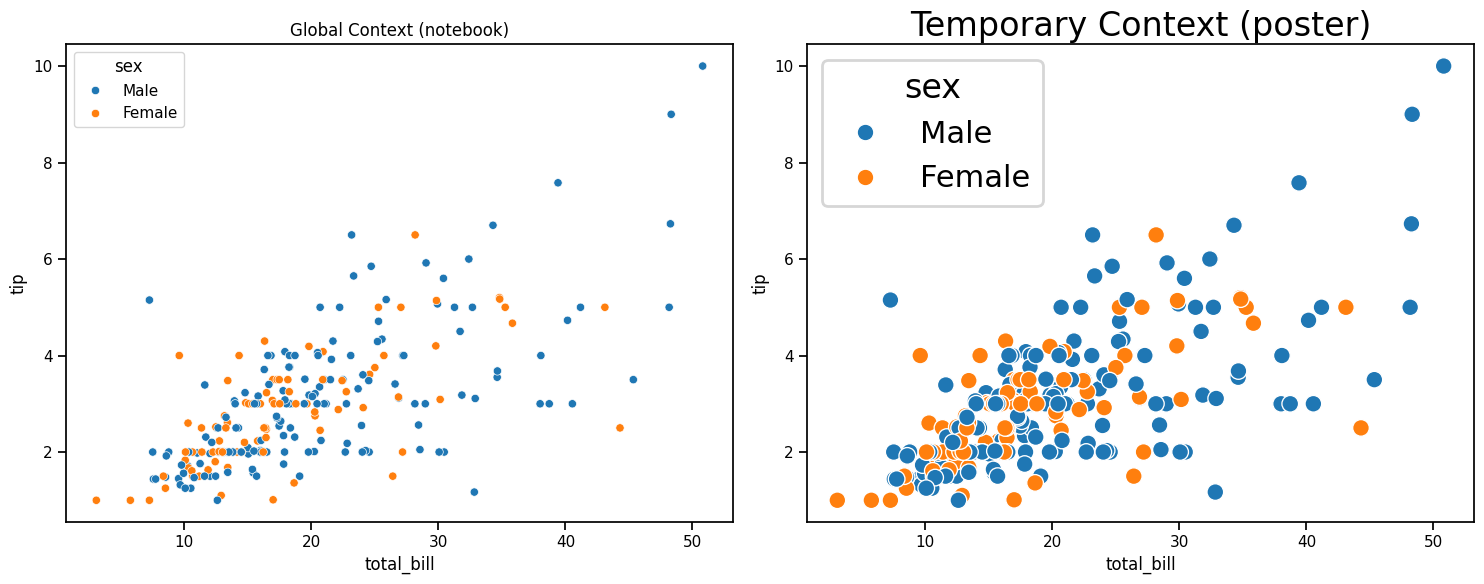

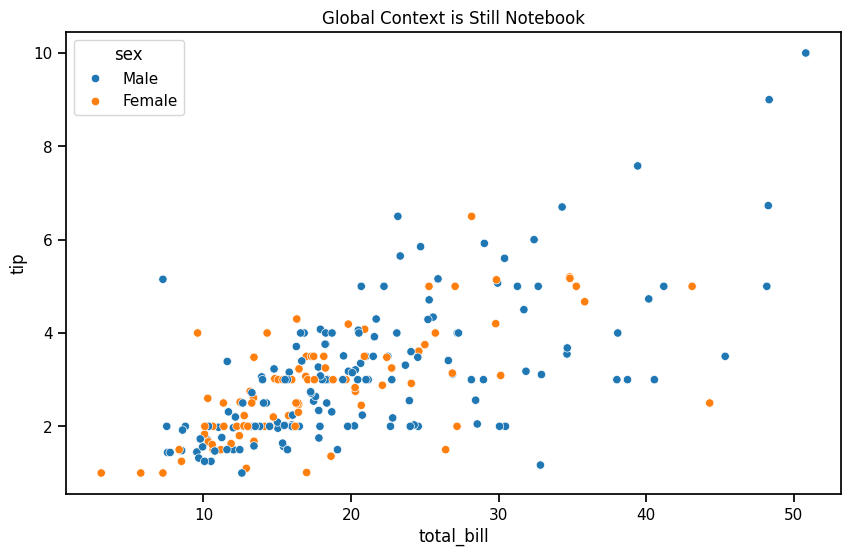

In [11]:
# Set the global context to notebook
sns.set_context("notebook")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot with the global context (notebook)
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", ax=ax1)
ax1.set_title("Global Context (notebook)")

# Plot with a temporary context (poster)
with sns.plotting_context("poster"):  # Temporarily set the context to poster
    sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", ax=ax2)
    ax2.set_title("Temporary Context (poster)")

plt.tight_layout()
plt.show()

# Create another plot to show that the global context is still notebook
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Global Context is Still Notebook")
plt.show()